In [1]:
from numpy import *
from matplotlib import *
from pylab import *
from scipy import *
from numpy import*
import csv
import xlrd
import xlsxwriter


rc('text',usetex = True)
rc('font', family='serif')

from scipy.optimize import curve_fit

In [2]:
Prop = xlrd.open_workbook('Data.xlsx') #Import Properties File

dTad = Prop.sheet_by_name('dT')

T_exp = dTad.col_values(0) #Import experimented temperatures
B_exp = dTad.col_values(1) #Import experimented magnetic fields
dT_ad = dTad.col_values(2) #Import experimented dT
C = dTad.col_values(3) #Import experimented C

In [3]:
K = len(dTad.col_values(0)) #Import data number
Nl = len(dTad.row_values(0))

In [4]:
T_new = []
for i in range(4,Nl):
    T_new.append(dTad.col_values(i))

In [5]:
len(T_new[0])

85329

In [7]:
dT_ad_new = np.zeros([Nl-4,K])
C_new = np.zeros([Nl-4,K])

for k in range(Nl-4):
    A = 0
    print(k)
    for i in range (len(T_exp)):
        #print(i)
        #print(A)
        for j in range(A,len(T_new[k])):
            #j = A
            #print(k,j)
            #while B_exp[j] <= B_exp[i]:
                #print(i,j)
            if B_exp[j] > B_exp[i]:
                break
            elif B_exp[i] == B_exp[j] and round(T_exp[i],1) == round(T_new[k][j],1):
                dT_ad_new[k][i] = dT_ad[j]
                C_new[k][i] = C[j]
                A = j
                #print(k,i,j,A,dT_ad_new[k][i],T_exp[i],B_exp[i])
                break


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


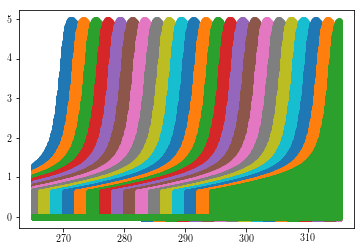

In [9]:
for i in range(Nl-4):
    plt.plot(T_exp,dT_ad_new[i],'o')

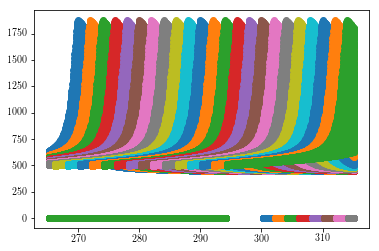

In [10]:
for i in range(Nl-4):
    plt.plot(T_exp,C_new[i],'o')

In [16]:
workbook = xlsxwriter.Workbook('La-Fe-Si.xlsx')
dT = workbook.add_worksheet('dT')
C = workbook.add_worksheet('C')

for i in range(len(T_exp)):
    C.write(i,0,T_exp[i]) 
    C.write(i,1,B_exp[i]) 
    dT.write(i,0,T_exp[i]) 
    dT.write(i,1,B_exp[i])
    for j in range(Nl-4):
        C.write(i,j+2,C_new[j][i]) 
        dT.write(i,j+2,dT_ad_new[j][i]) 

workbook.close()